In [1]:
import pandas as pd
import os
import pickle as pkl
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import spearmanr, weightedtau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
results_dirs = [
                # SelfTraining (just to test)
                "results/semisupervised_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_LogisticRegression_SelfTraining",
                
                # CoReg
                "results/semisupervised_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_MultiviewCoReg_multiviewcoregression",
                # "results/semisupervised_extrapolation_experiments_trainedwith_1_2_testedwith_3_avgfp_MultiviewCoReg_multiviewcoregression",
                "results/semisupervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_MultiviewCoReg_MultiViewCoRegression",
                "results/semisupervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_MultiviewCoReg_MultiviewCoRegression_Acthely_factors_BLOSUM62",

                # ProteinBERT
                "results/proteinbert_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_proteinbert_regression_valfromtrain",
                "results/proteinbert_extrapolation_experiments_trainedwith_1_2_testedwith_3_avgfp_proteinbert_regression",
                "results/proteinbert_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_proteinbert_regression",

                # Supervised
                "results/supervised_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_Ridge",
                "results/supervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_Ridge",
                "results/supervised_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_KNeighborsRegressor",
                "results/supervised_extrapolation_experiments_trainedwith_1_2_testedwith_3_avgfp_KNeighborsRegressor",
                "results/supervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_KNeighborsRegressor",
                "results/supervised_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_SVR",
                "results/supervised_extrapolation_experiments_trainedwith_1_2_testedwith_3_avgfp_SVR",
                "results/supervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_SVR",

                # Tritraining
                "results/semisupervised_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_Ridge_tritrainingregressor",
                #"results/semisupervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_Ridge_tritrainingregressor",
                "results/semisupervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_Ridge_TriTrainingRegressor_One_hot",
                #"results/semisupervised_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_SVR_tritrainingregressor",
                "results/semisupervised_extrapolation_experiments_trainedwith_1_2_testedwith_3_avgfp_SVR_tritrainingregressor",
                #"results/semisupervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_SVR_tritrainingregressor",
                "results/semisupervised_extrapolation_experiments_trainedwith_1_2_3_4_5_6_7_8_9_10_testedwith_1_2_3_4_5_6_7_8_9_10_avgfp_SVR_TriTrainingRegressor_One_hot"

                ]

In [3]:
# Pequeño arreglo para cambiar el nombre de los pred files dentro de la metadata
# Esto viene de que le he cambiado el nombre a la carpeta padre pero dentro de la metadata sigue el nombre antiguo
# results_df = pd.DataFrame(columns=["Encoding", "Labeled percentage", "Train size", "Train variants", "Test variants", "Model", "SS Method", "Normalization method", "Spearman's rho", "Weighted tau"])
# # For each results dir
# for results_dir in results_dirs:
#     # For each file in dir
#     for file in os.listdir(results_dir):
#         if "metadata" in file:
#             print(file)
#             metadata = pkl.load(open(os.path.join(results_dir, file), "rb"))
#             print(metadata["preds_file"])
#             if "valfromtest" in results_dir:
#                 metadata["preds_file"] = metadata["preds_file"].replace("results/proteinbert_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_proteinbert_regression/", "results/proteinbert_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_proteinbert_regression_valfromtest/")
#             elif "valfromtrain" in results_dir:
#                 metadata["preds_file"] = metadata["preds_file"].replace("results/proteinbert_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_proteinbert_regression/", "results/proteinbert_extrapolation_experiments_trainedwith_1_testedwith_2_avgfp_proteinbert_regression_valfromtrain/")

#             # Save new metadata
#             pkl.dump(metadata, open(os.path.join(results_dir, file), "wb"))
            

In [4]:
results_df = pd.DataFrame(columns=["Encoding", "Labeled percentage", "Train size", "Train variants", "Test variants", "Model", "SS Method", "Normalization method", "Spearman's rho", "Weighted tau"])
# For each results dir
for results_dir in results_dirs:
    # For each file in dir
    for file in os.listdir(results_dir):
        if "metadata" in file:
            print(file)
            metadata = pkl.load(open(os.path.join(results_dir, file), "rb"))
            if "semisupervised" in results_dir and not "SelfTraining" in results_dir:
                if metadata["Encoding2"] == None:
                    enc = metadata["Encoding1"]
                else:
                    enc = metadata["Encoding1"] + " + " + metadata["Encoding2"]
            else:
                enc = metadata["Encoding"]
            labeled_percentage = metadata["Labeled percentage"]
            model = metadata["Model"]
            ss_method = metadata["SS Method"]
            normalization_method = metadata["normalization_method"]
            n_splits = metadata["n_splits"]
            preds_file = metadata["preds_file"]
            pred_mode = metadata["pred_mode"]
            train_variants = "_".join([str(v) for v in metadata["Train variants"]])
            test_variants = "_".join([str(v) for v in metadata["Test variants"]])

            # Load the results
            results = pkl.load(open(preds_file, "rb"))

            # Quick step to test validation set influence
            if model == "ProteinBERT":
                if "valfromtest" in results_dir:
                    model = "ProteinBERT (val from test)"
                elif "valfromtrain" in results_dir:
                    model = "ProteinBERT (val from train)"
            
            # For each split
            for split in range(n_splits):
                # Get the results
                results_split = results[split]
                y_proba = results_split["y_proba"]
                original_y_test = results_split["original_y_test"]
                y_test = results_split["y_test"]
              
                train_size = results_split["train_len"]

                mse = mean_squared_error(original_y_test, y_proba)
                spearman_r = spearmanr(original_y_test, y_proba)[0]
                weighted_tau = weightedtau(original_y_test, y_proba)[0]

                # Add the results to the dataframe
                results_df = pd.concat([results_df, 
                                        pd.DataFrame({"Encoding": enc,
                                                      "Labeled percentage": labeled_percentage,
                                                      "Train size": train_size,
                                                      "Train variants": train_variants,
                                                      "Test variants": test_variants,
                                                      "Model": model,
                                                      "Prediction mode": pred_mode,
                                                      "SS Method": ss_method,
                                                      "Normalization method": normalization_method,
                                                      "MSE": mse,
                                                      "Spearman's rho": spearman_r,
                                                      "Weighted tau": weighted_tau
                                                      }, index=[0])], ignore_index=True)
            

pred_dict_ss_One_hot_1_metadata.pkl
pred_dict_ss_One_hot_0.01_metadata.pkl
pred_dict_ss_One_hot_0.05_metadata.pkl
pred_dict_ss_One_hot_0.1_metadata.pkl
pred_dict_ss_One_hot_0.75_metadata.pkl
pred_dict_ss_One_hot_0.25_metadata.pkl
pred_dict_ss_One_hot_0.5_metadata.pkl
pred_dict_ss_One_hot_0.01_metadata.pkl
pred_dict_ss_One_hot_0.05_metadata.pkl
pred_dict_ss_One_hot_0.1_metadata.pkl
pred_dict_ss_One_hot_0.25_metadata.pkl
pred_dict_ss_One_hot_0.75_metadata.pkl
pred_dict_ss_One_hot_0.5_metadata.pkl
pred_dict_ss_One_hot_0.001_metadata.pkl
pred_dict_ss_One_hot_0.0025_metadata.pkl
pred_dict_ss_One_hot_0.005_metadata.pkl
pred_dict_ss_One_hot_0.01_metadata.pkl
pred_dict_ss_One_hot_0.05_metadata.pkl
pred_dict_ss_One_hot_0.1_metadata.pkl
pred_dict_ss_One_hot_0.25_metadata.pkl
pred_dict_ss_One_hot_0.75_metadata.pkl
pred_dict_ss_One_hot_0.5_metadata.pkl
pred_dict_ss_Acthely_factors_BLOSUM62_0.001_metadata.pkl
pred_dict_ss_Acthely_factors_BLOSUM62_0.0025_metadata.pkl
pred_dict_ss_Acthely_factors_BLO

In [5]:
results_df["Encoding"].unique()

array(['One_hot', 'Acthely_factors + BLOSUM62', 'None'], dtype=object)

In [6]:
# Manually set the semi-supervised methods for 100% labeled data to their base models results (SS is not applied when 100% labeled data anyway)
# ss_models = ["TriTrainingRegressor", "MultiviewCoReg", "SelfTraining"]

# for ss_model in ss_models:
#     for base_model in results_df[results_df["SS Method"] == ss_model]["Model"].unique():
#         # Duplicate all the rows where column Model is base_model and SS Method in None but changing the SS Method to ss_model
#         new_rows = results_df[(results_df["Model"] == base_model) & (results_df["SS Method"] == "None")].copy()
#         new_rows["SS Method"] = ss_model
#         results_df = pd.concat([results_df, new_rows], ignore_index=True)

In [7]:
results_df[(results_df["Model"] == "MultiviewCoReg") & (results_df["Labeled percentage"] == 0.05) & (results_df["Train variants"] == "1_2_3_4_5_6_7_8_9_10") & (results_df["Test variants"] == "1_2_3_4_5_6_7_8_9_10")]

,Encoding,Labeled percentage,Train size,Train variants,Test variants,Model,SS Method,Normalization method,Spearman's rho,Weighted tau,Prediction mode,MSE
85,One_hot,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.351168,0.389515,regression,1.523808
86,One_hot,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.352200,0.346475,regression,1.472412
87,One_hot,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.400032,0.290908,regression,1.458736
88,One_hot,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.378686,0.340861,regression,1.413502
89,One_hot,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.414683,0.447021,regression,1.451469
130,Acthely_factors + BLOSUM62,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.517056,0.406117,regression,1.049969
131,Acthely_factors + BLOSUM62,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.486990,0.432102,regression,1.008406
132,Acthely_factors + BLOSUM62,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.470981,0.380421,regression,1.074167
133,Acthely_factors + BLOSUM62,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.489086,0.364589,regression,1.118768
134,Acthely_factors + BLOSUM62,0.05,1302,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.497603,0.474699,regression,1.004928


In [8]:
results_df[(results_df["Labeled percentage"] == 0.0025) & (results_df["Train variants"] == "1_2_3_4_5_6_7_8_9_10")]

,Encoding,Labeled percentage,Train size,Train variants,Test variants,Model,SS Method,Normalization method,Spearman's rho,Weighted tau,Prediction mode,MSE
70,One_hot,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.182387,0.291496,regression,1.995242
71,One_hot,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.143727,0.229648,regression,1.871236
72,One_hot,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.144457,0.156632,regression,1.675993
73,One_hot,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.125939,0.202521,regression,1.359686
74,One_hot,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.081764,0.045912,regression,1.902855
115,Acthely_factors + BLOSUM62,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.248479,0.238777,regression,1.136307
116,Acthely_factors + BLOSUM62,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.201059,0.110756,regression,1.242833
117,Acthely_factors + BLOSUM62,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.143263,0.025451,regression,1.280877
118,Acthely_factors + BLOSUM62,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.235295,0.121598,regression,1.097602
119,Acthely_factors + BLOSUM62,0.0025,65,1_2_3_4_5_6_7_8_9_10,1_2_3_4_5_6_7_8_9_10,MultiviewCoReg,MultiviewCoReg,None,0.250232,0.344074,regression,1.178762


In [9]:
metric = "Spearman's rho"   # "MSE", "Spearman's rho" or "Weighted tau"
# metric = "Weighted tau"
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
# Rank df by AUC mean grouped by view and labeled

labeled_percentage = 0.75

# train_variants = "1"
# test_variants = "2"
# train_variants = "1_2"
# test_variants = "3"
train_variants = "1_2_3_4_5_6_7_8_9_10"
test_variants = "1_2_3_4_5_6_7_8_9_10"

display_df = results_df[(results_df["Labeled percentage"] == labeled_percentage) & (results_df["Train variants"] == train_variants) & (results_df["Test variants"] == test_variants)]
display(display_df.groupby(['Model', 'SS Method', 'Labeled percentage', 'Train size', 'Prediction mode', 'Train variants', 'Test variants', 'Encoding']).mean().sort_values(by=metric, ascending=False))

Spearman's rho  \
Model               SS Method            Labeled percentage Train size Prediction mode Train variants       Test variants        Encoding                                     
ProteinBERT         None                 0.75               15630      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 None                              0.876362   
SVR                 TriTrainingRegressor 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                           0.864448   
                    None                 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                           0.860113   
Ridge               None                 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                           0.857541   
                    TriTrainingRegressor 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                           0.847327   
MultiviewCoReg      MultiviewCoReg       0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 Acthely_factors + BLOSUM62        0.696545   
KNeighborsRegressor None                 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                           0.557358   
MultiviewCoReg      MultiviewCoReg       0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                           0.538420   

                                                                                                                                                             Weighted tau  \
Model               SS Method            Labeled percentage Train size Prediction mode Train variants       Test variants        Encoding                                   
ProteinBERT         None                 0.75               15630      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 None                            0.802296   
SVR                 TriTrainingRegressor 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                         0.739958   
                    None                 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                         0.774201   
Ridge               None                 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                         0.687309   
                    TriTrainingRegressor 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                         0.718264   
MultiviewCoReg      MultiviewCoReg       0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 Acthely_factors + BLOSUM62      0.550324   
KNeighborsRegressor None                 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                         0.492985   
MultiviewCoReg      MultiviewCoReg       0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                         0.457016   

                                                                                                                                                                  MSE  
Model               SS Method            Labeled percentage Train size Prediction mode Train variants       Test variants        Encoding                              
ProteinBERT         None                 0.75               15630      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 None                        0.070152  
SVR                 TriTrainingRegressor 0.75               19539      regression      1_2_3_4_5_6_7_8_9_10 1_2_3_4_5_6_7_8_9_10 One_hot                     0.380181  
   

In [10]:
#selected_metric = "Weighted tau"
selected_metric = "Spearman's rho"

/tmp/ipykernel_55423/479639520.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df["Model"] = boxplot_df["Model"].str.replace("MultiviewCoReg", "KNeighborsRegressor")
/tmp/ipykernel_55423/479639520.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_df["SS Method"] = boxplot_df.apply(lambda x: "SingleviewCoReg" if x["SS Method"] == "MultiviewCoReg" and x["Encoding"] == "One_hot" else x["SS Method"], axis=1)
/tmp/ipykernel_55423/479639520.py:13: SettingWithCopyWarning: 
A value is trying 

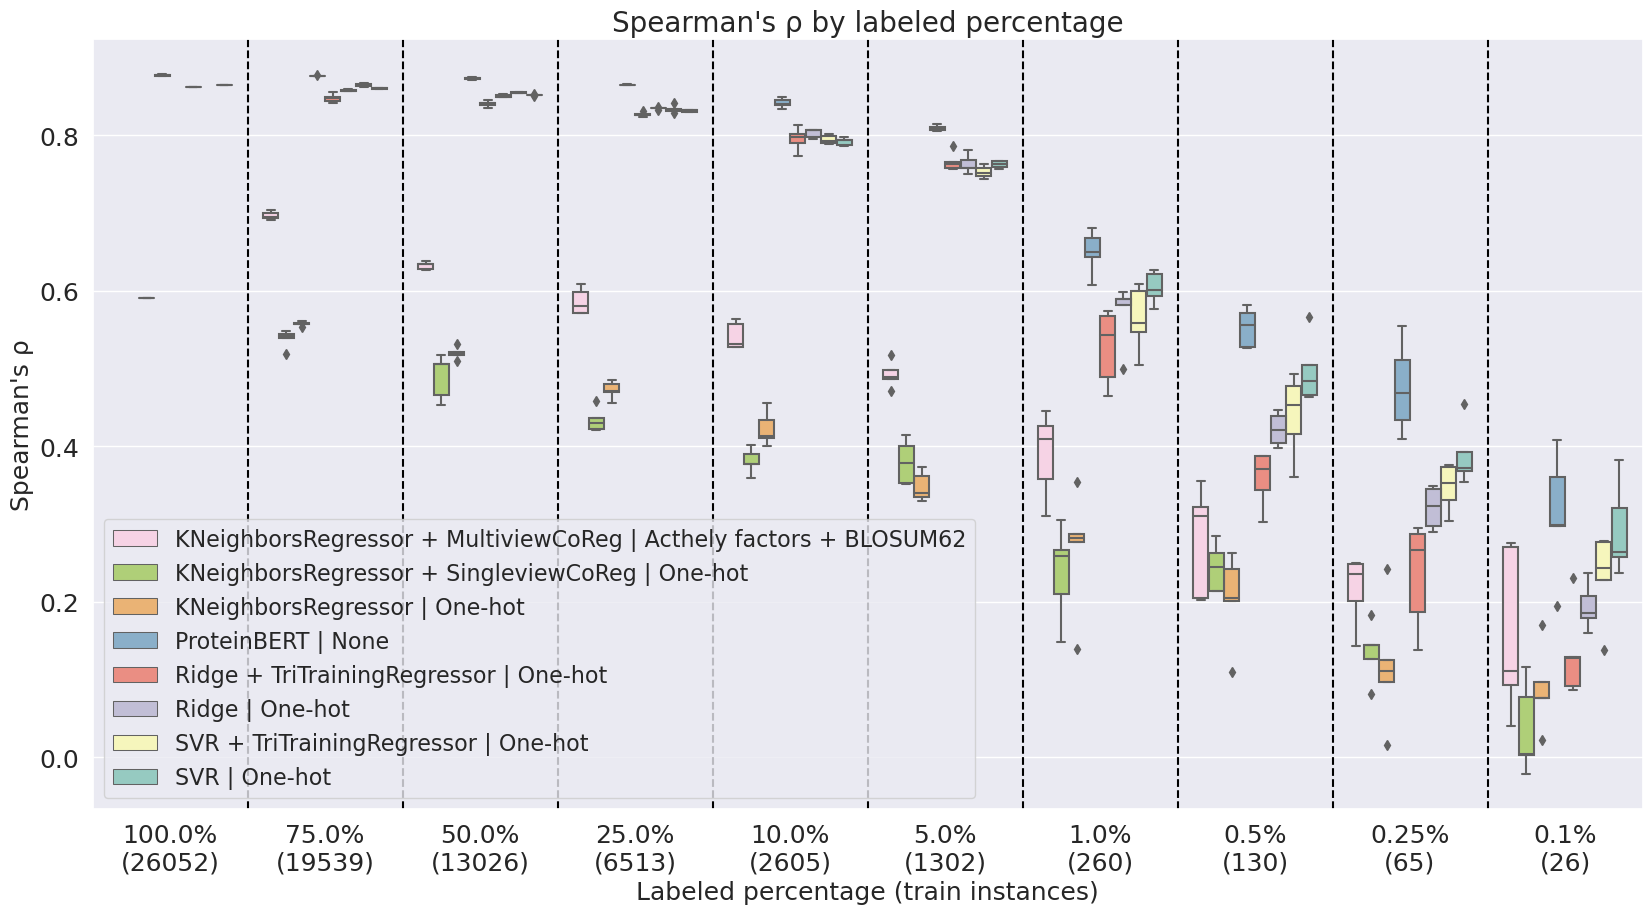

In [11]:
plt.figure(figsize=(20, 10))

# Boxplot dataframe from results_df grouped by Model and SS Method
boxplot_df = results_df[(results_df["Train variants"] == train_variants) & (results_df["Test variants"] == test_variants)]

# Substitute Model column when it is MultiviewCoReg for KNeighborsRegressor
boxplot_df["Model"] = boxplot_df["Model"].str.replace("MultiviewCoReg", "KNeighborsRegressor")

# Change MultiviewCoReg to SingleviewCoReg if there is only one encoding
boxplot_df["SS Method"] = boxplot_df.apply(lambda x: "SingleviewCoReg" if x["SS Method"] == "MultiviewCoReg" and x["Encoding"] == "One_hot" else x["SS Method"], axis=1)

# Create method column with Model + SS Method (if SS Method is not None) + Encoding
boxplot_df["Method"] = boxplot_df["Model"] + boxplot_df["SS Method"].apply(lambda x: " + " + x if x != "None" else "") + " | " + boxplot_df["Encoding"]

# Replace One_hot with One-hot and Acthely_factors with Acthely factors
boxplot_df["Method"] = boxplot_df["Method"].str.replace("One_hot", "One-hot").str.replace("Acthely_factors", "Acthely factors")

# Sort by Method
boxplot_df = boxplot_df.sort_values(by="Method", ascending=False)


# Boxplot grouped by labeled percentage
sns.set_theme(style="darkgrid")

# Increase font sizes
title_font_size = 20
label_font_size = 18
tick_font_size = 18
legend_font_size = 16

ax = sns.boxplot(x="Labeled percentage", y=selected_metric, data=boxplot_df, hue="Method", palette="Set3")
# ax.set_title("Spearman's rho by labeled percentage - Train variants: " + train_variants + " - Test variants: " + test_variants, fontsize=title_font_size)
ax.set_title("Spearman's ρ by labeled percentage" ,fontsize=title_font_size)
ax.set_xlabel("Labeled percentage (train instances)", fontsize=label_font_size)
ax.set_ylabel("Spearman's ρ", fontsize=label_font_size)
ax.tick_params(labelsize=tick_font_size)
#ax.set_ylim(0, 1)


ax.set_xticklabels([str(x*100) + "%" + "\n" + "(" + str(int(x*boxplot_df["Train size"].max())) + ")" for x in sorted(boxplot_df["Labeled percentage"].unique())])

[plt.axvline(x+0.5, color = 'black', linestyle='--') for x in range(len(boxplot_df["Labeled percentage"].unique())-1)]

ax.legend(loc="lower left", fontsize=legend_font_size)

# Flip x axis
ax.invert_xaxis()

# Show the boxes in the same order as the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc="lower left", fontsize=legend_font_size)

# Save in pdf
plt.savefig("boxplot_allvariants.pdf", bbox_inches='tight')

plt.show()